In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from boltzmann_machines.RTRBM_no_bias import RTRBM_nobias
from boltzmann_machines.RTRBM import RTRBM

In [36]:
N_V = 20
T = 30
n_batches = 500
N_H = 3

data = torch.zeros(N_V, T, n_batches)

pre_defined_sparse_rtrbm = RTRBM_nobias(data, N_H=N_H, device='cpu')

Text(403.4117647058824, 0.5, 'amount')

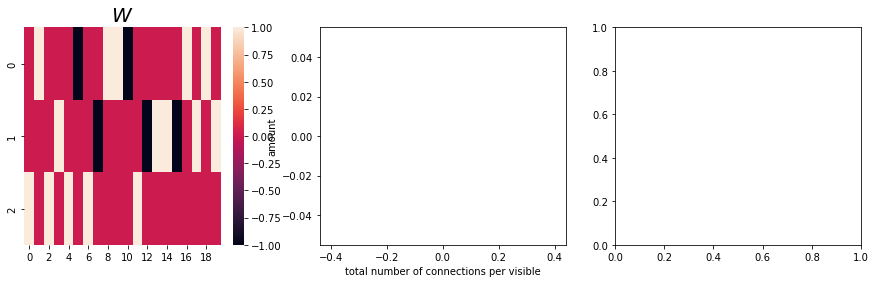

In [37]:
W = torch.zeros(N_H, N_V)
for V in range(N_V):
    n_conn = 1

    hidden_conn = torch.randint(low=0, high=N_H, size=(int(n_conn), 1))
    while torch.sum(hidden_conn == hidden_conn.T) > n_conn:
        hidden_conn = torch.randint(low=0, high=N_H, size=(int(n_conn), 1))

    x = torch.rand(1)
    if x > .7:
        W[hidden_conn, V] = -1
    else:
        W[hidden_conn, V] = 1


max_number_of_conn = int(torch.max(torch.sum(torch.abs(W), 0)))
tmp = torch.zeros(max_number_of_conn)
for i in range(max_number_of_conn):
    tmp[i] = torch.sum(torch.sum(torch.abs(W), 0) == i)

fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.heatmap(W, ax=axes[0])
axes[0].set_title('$W$', fontsize=20)
axes[1].bar(torch.arange(max_number_of_conn), tmp)
axes[1].set_xlabel('total number of connections per visible')
axes[1].set_ylabel('amount')


Find a balanced network

tensor([0.9053, 0.8482, 0.8787])
tensor([0.9046, 0.7757, 0.9935])
tensor([0.8397, 0.9602, 0.9362])
tensor([0.9711, 0.9308, 0.7862])
tensor([0.9703, 0.7762, 0.9848])
tensor([0.9660, 0.8692, 0.9847])
tensor([0.9785, 0.8692, 0.8468])
tensor([0.8899, 0.5671, 0.9592])
tensor([0.8886, 0.9372, 0.8750])
tensor([0.9670, 0.9933, 0.9308])
tensor([0.6744, 0.6454, 0.9154])
tensor([0.8989, 0.7958, 0.9907])
tensor([0.9582, 0.7910, 0.9886])
tensor([0.7695, 0.9756, 0.9924])
tensor([0.7604, 0.9674, 0.9864])
tensor([0.9130, 0.9091, 0.9618])
tensor([0.9501, 0.9041, 0.7655])
tensor([0.9118, 0.8472, 0.7971])
tensor([0.4972, 0.9476, 0.6259])
tensor([0.9868, 0.8827, 0.9457])
tensor([0.7108, 0.9525, 0.9823])
tensor([0.9759, 0.8928, 0.9714])
tensor([0.7194, 0.5339, 0.9980])
tensor([0.9693, 0.9604, 0.9837])
tensor([0.5977, 0.9794, 0.9304])
tensor([0.9941, 0.8331, 0.9823])
tensor([0.7539, 0.9811, 0.8461])
tensor([0.9681, 0.7815, 0.7606])
tensor([0.9730, 0.9368, 0.3629])
tensor([0.6060, 0.8244, 0.7321])


Text(0.5, 1.0, '$r^{[t]}$')

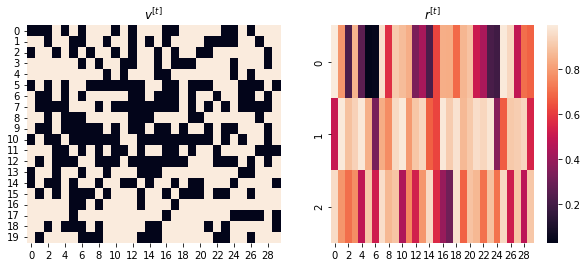

In [38]:
from tqdm import tqdm
b_init = torch.zeros(1, N_H, dtype=torch.float)
b_V = torch.zeros(1, N_V, dtype=torch.float)
b_H = torch.zeros(1, N_H, dtype=torch.float)

pre_defined_sparse_rtrbm.W = W
pre_defined_sparse_rtrbm.W_acc = torch.randn(N_H, N_H)
pre_defined_sparse_rtrbm.b_V = torch.zeros(1, N_V)
pre_defined_sparse_rtrbm.b_H = torch.zeros(1, N_H)
pre_defined_sparse_rtrbm.b_init = torch.zeros(1, N_H)
v_start = (torch.rand(N_V) > 0.2)*1.0
data, rt = pre_defined_sparse_rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=0, gibbs_k=20, mode=1, disable_tqdm=True)
print(torch.mean(rt, 1))
while torch.min(torch.mean(rt, 1) < .15) or torch.max(torch.mean(rt, 1) > .85):
    pre_defined_sparse_rtrbm.W_acc = torch.randn(N_H, N_H)
    # pre_defined_sparse_rtrbm.b_H = torch.randn(1, N_H) + torch.randn(1)
    # pre_defined_sparse_rtrbm.b_init = torch.randn(1, N_H) + torch.randn(1)
    v_start = (torch.rand(N_V) > 0.2)*1.0
    data, rt = pre_defined_sparse_rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=0, gibbs_k=20, mode=1, disable_tqdm=True)
    print(torch.mean(rt, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(data, ax=axes[0], cbar=False)
axes[0].set_title('$v^{[t]}$')
sns.heatmap(rt, ax=axes[1])
axes[1].set_title('$r^{[t]}$')

Can the RTRBM train on this? (with bias -aid)

In [39]:
data = torch.zeros(N_V, T, n_batches)
rt = torch.zeros(N_H, T, n_batches)
for batch in tqdm(range(n_batches)):
    v_start = (torch.rand(N_V) > 0.2)*1.0
    data[:, :, batch], rt[:, :, batch] = pre_defined_sparse_rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=0, gibbs_k=20, mode=1, disable_tqdm=True)

100%|██████████| 500/500 [00:34<00:00, 14.56it/s]


In [ ]:
rtrbm = RTRBM_nobias(data, N_H=N_H, device='cpu')

rtrbm.learn(n_epochs=200, lr=1e-4, batchsize=100, CDk=10)

 20%|██        | 41/200 [01:47<07:06,  2.68s/it]

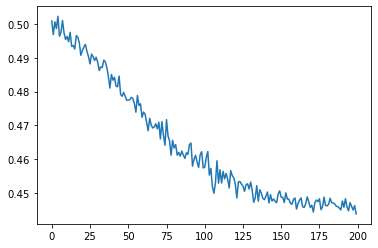

In [21]:
plt.plot(rtrbm.errors)

<AxesSubplot:>

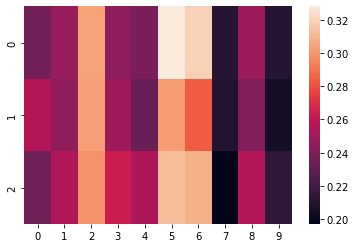

In [22]:
sns.heatmap(rtrbm.W)

<AxesSubplot:>

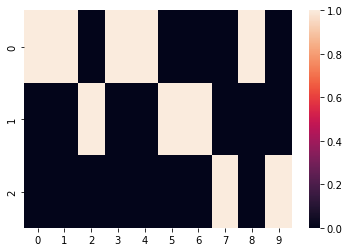

In [13]:
sns.heatmap(pre_defined_sparse_rtrbm.W)

In [24]:
rtrbm.learn(n_epochs=1000, lr=5e-5, batchsize=25, CDk=10, mom=0, wc=0)

100%|██████████| 1000/1000 [21:15<00:00,  1.28s/it]


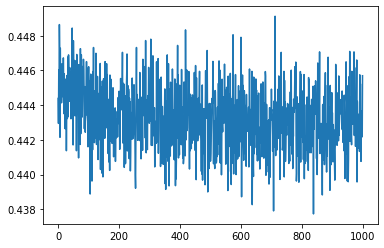

In [25]:
plt.plot(rtrbm.errors)

<AxesSubplot:>

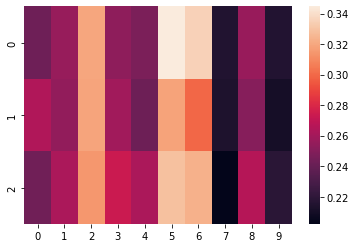

In [26]:
sns.heatmap(rtrbm.W)

<AxesSubplot:>

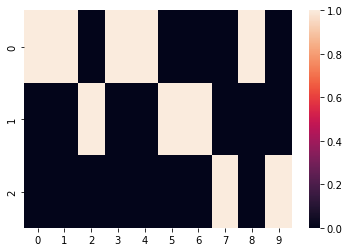

In [27]:
sns.heatmap(pre_defined_sparse_rtrbm.W)

In [30]:
rtrbm.b_H

tensor([[0., 0., 0.]])